# Dividindo os dados em conjuntos de treino e teste

In [6]:
import subprocess
import os
import shutil
from sklearn.model_selection import train_test_split

In [2]:
songsPath = "./songs"
styles = {}

for dirpath, dnames, fnames in os.walk(songsPath):
    folders = dirpath.split('/')
    if(len(folders) == 4):
        for file in fnames:
            if(folders[2] in styles):
                styles[folders[2]].append(f"{dirpath}/{file}")
            else:
                styles[folders[2]] = [f"{dirpath}/{file}"]

In [76]:
 # train_test_split -> X_train, X_test
dataSets = {key: train_test_split(styles[key], test_size=0.3, random_state=42) for key in styles}

In [ ]:

for style in dataSets:
    for i, dataSet in enumerate(dataSets[style]):
        path = f"dataset/{style}/{'train' if i == 0 else 'test'}"
        os.makedirs(path, exist_ok=True)
        for music in dataSet:
            shutil.copy(music, path)
        subprocess.run(["tar", "-cf", f"{path}.tar", path])

# Testando com todos arquivos em um único pacote .tar

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
l = [[1.511095, 2.753300, 1.788333, 1.858128],
     [1.611030, 2.609286, 1.818159, 1.862341],
     [1.576399, 2.757560, 1.742848, 1.841303],
     [1.577919, 2.705615, 1.772234, 1.791384]]

labels = ["Forró", "Hip-hop", "MPB", "Rock"]


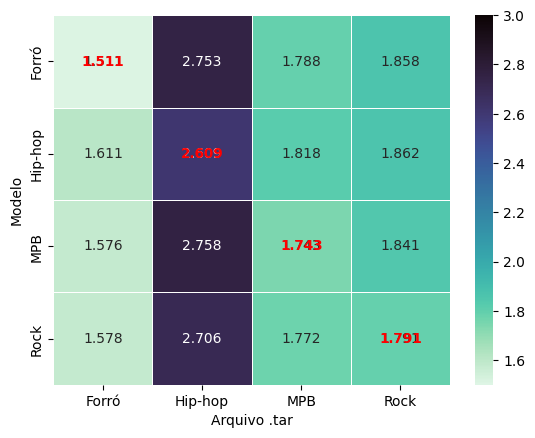

In [92]:
sns.heatmap(l, cmap="mako_r", vmin=1.5, vmax=3, linewidths=.5, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)

# Annotating the lowest value of each column
for i in range(len(l[0])):
    min_val = min(row[i] for row in l)
    min_idx = [row[i] for row in l].index(min_val)
    plt.text(i + 0.5, min_idx + 0.5, f'{min_val:.3f}', color='red', fontsize=9.75,
             ha='center', va='center', fontweight='bold')


plt.xlabel('Arquivo .tar')
plt.ylabel('Modelo')
# plt.title('Mapa de calor do comprimento médio por modelo')
# plt.show()
plt.savefig("heatmap.png", dpi=300, transparent=True)

# Teste com arquivos individuais

In [87]:
import json
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report
from predict import predict

In [72]:
results = []
for style in dataSets:
    for dir,_,files in os.walk(f"dataset/{style}/test"):
        for file in files:
            prediction = predict(f"{dir}/{file}")
            print(prediction == style, "\n")
            results.append((style, prediction))


Execution successful for Forró!	l=3.090129
Execution successful for Hip-hop!	l=3.038627
Execution successful for MPB!	l=2.961373
Execution successful for Rock!	l=2.858369
True 

Execution successful for Forró!	l=3.669903
Execution successful for Hip-hop!	l=3.291262
Execution successful for MPB!	l=3.509709
Execution successful for Rock!	l=3.509709
False 

Execution successful for Forró!	l=3.723429
Execution successful for Hip-hop!	l=3.600000
Execution successful for MPB!	l=3.723429
Execution successful for Rock!	l=3.641143
False 

Execution successful for Forró!	l=3.478992
Execution successful for Hip-hop!	l=3.506494
Execution successful for MPB!	l=3.465241
Execution successful for Rock!	l=3.575248
False 

Execution successful for Forró!	l=2.973696
Execution successful for Hip-hop!	l=2.865713
Execution successful for MPB!	l=2.965390
Execution successful for Rock!	l=2.807568
True 

Execution successful for Forró!	l=3.639615
Execution successful for Hip-hop!	l=3.627235
Execution successfu

In [75]:
with open("individual_test.json", 'w') as f:
    json.dump(results, f)

In [83]:
len(results)

2099

In [81]:
y_true, y_pred = [r[0] for r in results], [r[1] for r in results]

In [82]:
print(confusion_matrix(y_true,y_pred))
print("\nAcurácia =", accuracy_score(y_true, y_pred))
print("Precisão =", precision_score(y_true, y_pred, average='weighted'))
print("Sensibilidade =", recall_score(y_true, y_pred, average='weighted'))
print("F1 =", f1_score(y_true, y_pred, average='weighted'))

[[581  19 103  37]
 [  4 151  13   9]
 [ 85  31 464  74]
 [ 30  65 135 298]]

Acurácia = 0.7117675083373035
Precisão = 0.7220164279440626
Sensibilidade = 0.7117675083373035
F1 = 0.7116621073601604


In [89]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       Forró       0.83      0.79      0.81       740
     Hip-hop       0.57      0.85      0.68       177
         MPB       0.65      0.71      0.68       654
        Rock       0.71      0.56      0.63       528

    accuracy                           0.71      2099
   macro avg       0.69      0.73      0.70      2099
weighted avg       0.72      0.71      0.71      2099



In [91]:
correct/len(results)

0.7117675083373035